In [2]:
### Setting env
import os, sys

folder = os.getcwd()
if(not(folder.endswith('tcc-machine-learning'))):
        os.chdir('..')
folder = os.getcwd()

### Core Packages
import pandas as pd
import numpy as np

### Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import plotly.graph_objects as go

### Financial Packages
import yfinance as yf
import pandas_datareader as pdr

### Thecnical Analysis Packages
import pandas_datareader as pdr
import ta
import pandas_ta as pdta
import talib

### Functions
from dags import config
from dags.utils import chose_path_to_work, save_image, generate_bollinger_bands, generate_ifr, generate_macd, generate_mme, generate_mme_label, generate_mms, generate_mms_label, generate_label

### Others
import warnings

#### Loading Data

In [3]:
ticker2 = 'vale3.sa'
df_ticker2 = pd.read_csv(f'data/raw/{ticker2}.csv', encoding='utf8', delimiter=',')
df_ticker2['date'] = pd.to_datetime(df_ticker2['date'])

ticker= 'petr4.sa'
df_ticker = pd.read_csv(f'data/raw/{ticker}.csv', encoding='utf8', delimiter=',')
df_ticker['date'] = pd.to_datetime(df_ticker['date'])

ticker3 = 'itub4.sa'
df_ticker3 = pd.read_csv(f'data/raw/{ticker3}.csv', encoding='utf8', delimiter=',')
df_ticker3['date'] = pd.to_datetime(df_ticker3['date'])

ticker4 = 'bbdc4.sa'
df_ticker4 = pd.read_csv(f'data/raw/{ticker4}.csv', encoding='utf8', delimiter=',')
df_ticker4['date'] = pd.to_datetime(df_ticker4['date'])

#### Implementing Technical Indicators

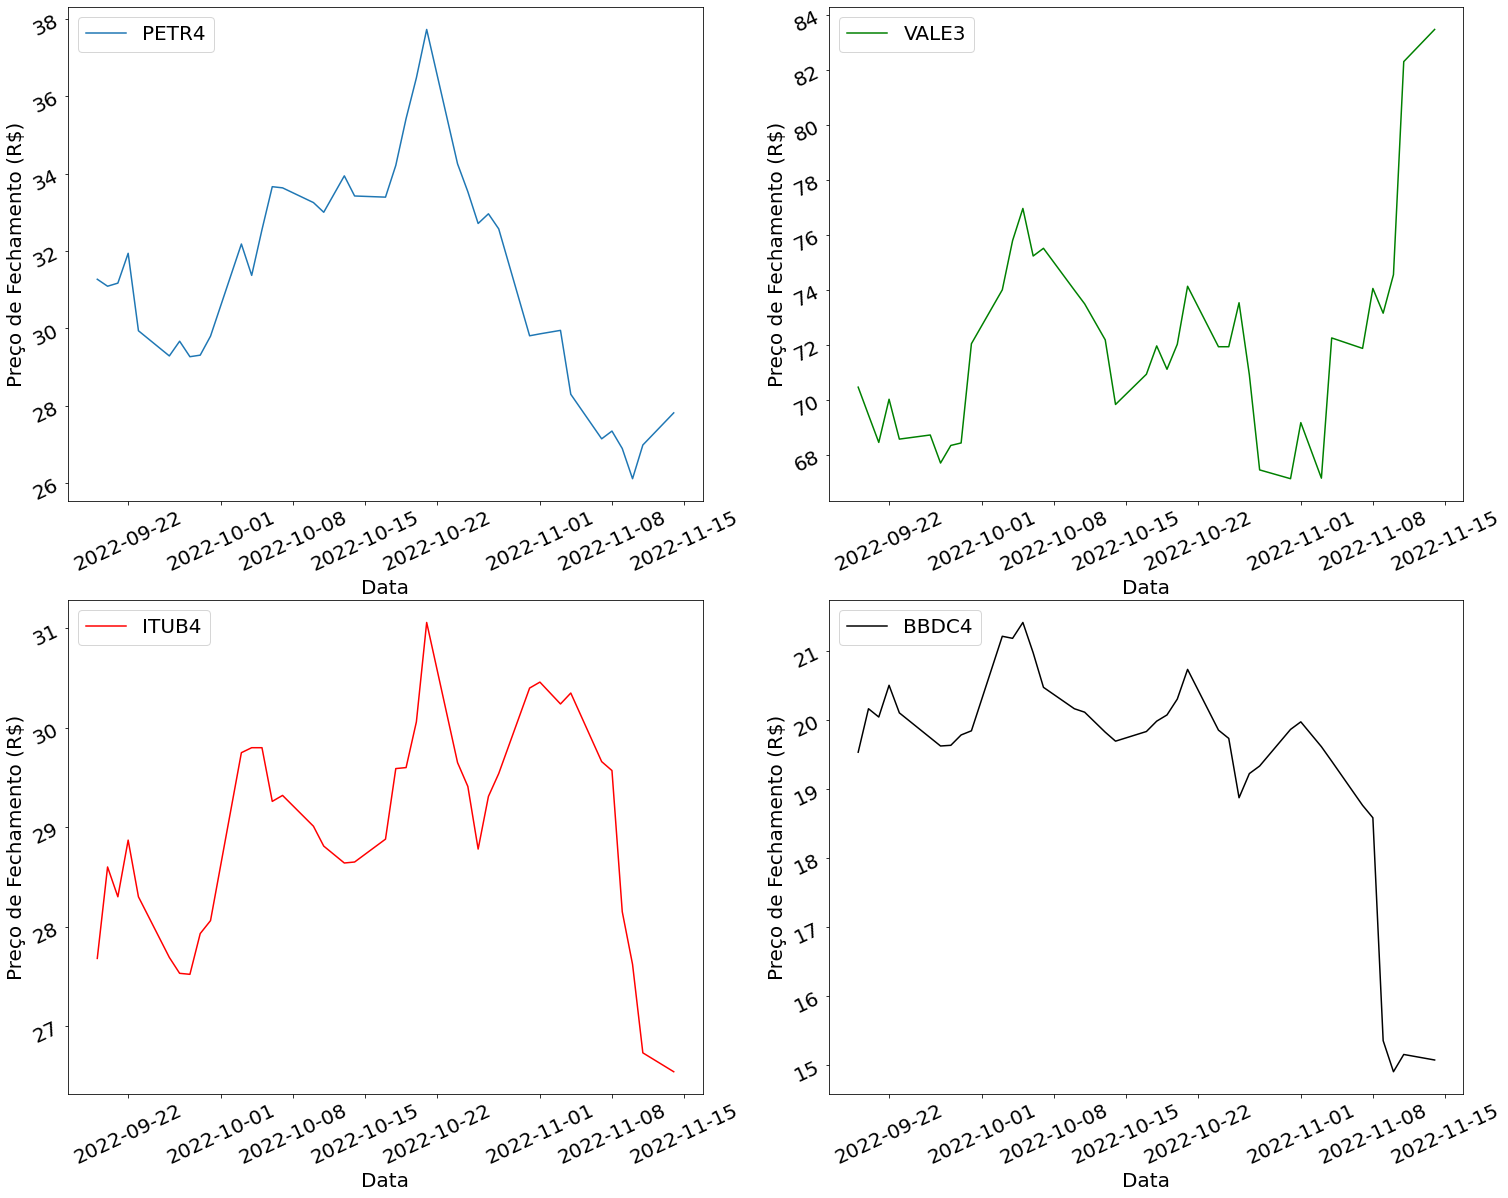

In [4]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

fig, ax = plt.subplots(2, 2, figsize=(25, 20))
sns.lineplot(x = 'date', y = 'close', data = df_ticker.loc[df_ticker.date >= '2022-09-17'].dropna(), ax = ax[0, 0])
ax[0, 0].legend((ticker.upper()[:-3],), loc='upper left' )
ax[0, 0].set_xlabel('Data')
ax[0, 0].set_ylabel('Preço de Fechamento (R$)')
ax[0, 0].tick_params(labelrotation=25)
sns.lineplot(x = 'date', y = 'close', data = df_ticker2.loc[df_ticker2.date >= '2022-09-17'].dropna(), ax = ax[0, 1], color='green')
ax[0, 1].legend((ticker2.upper()[:-3],), loc='upper left' )
ax[0, 1].set_xlabel('Data')
ax[0, 1].set_ylabel('Preço de Fechamento (R$)')
ax[0, 1].tick_params(labelrotation=25)
sns.lineplot(x = 'date', y = 'close', data = df_ticker3.loc[df_ticker3.date >= '2022-09-17'].dropna(), ax = ax[1, 0], color='red')
ax[1, 0].legend((ticker3.upper()[:-3],), loc='upper left' )
ax[1, 0].set_xlabel('Data')
ax[1, 0].set_ylabel('Preço de Fechamento (R$)')
ax[1, 0].tick_params(labelrotation=25)
sns.lineplot(x = 'date', y = 'close', data = df_ticker4.loc[df_ticker4.date >= '2022-09-17'].dropna(), ax = ax[1, 1], color='black')
ax[1, 1].legend((ticker4.upper()[:-3],), loc='upper left' )
ax[1, 1].set_xlabel('Data')
ax[1, 1].set_ylabel('Preço de Fechamento (R$)')
ax[1, 1].tick_params(labelrotation=25)
plt.show()

In [5]:
fig = go.Figure(data = go.Ohlc(
    x = df_ticker.date,
    open = df_ticker.open,
    high = df_ticker.high,
    low = df_ticker.low,
    close = df_ticker.close
))
fig.show()

In [6]:
ticker= 'bbdc4.sa'
df_ticker = pd.read_csv(f'data/raw/{ticker}.csv', encoding='utf8', delimiter=',')
df_ticker['date'] = pd.to_datetime(df_ticker['date'])
df_ticker = df_ticker.loc[~df_ticker['open'].isna()]

In [7]:
### Médias móveis simples
df_ticker = generate_mms(df_ticker, 15)
df_ticker = generate_mms(df_ticker, 30)
df_ticker = generate_mms_label(df_ticker, mms_short_collumn = 'mms_15', mms_long_column = 'mms_30')

### Médias Móveis Exponenciais
df_ticker = generate_mme(df_ticker, 50)
df_ticker = generate_mme(df_ticker, 200)

### Proximidade das Médias Móveis Exponenciais
df_ticker = generate_mme_label(df_ticker, 1.2, 0.8, 200)

### Bollinger Bands
df_ticker = generate_bollinger_bands(df_ticker, n_days = 20)

### Índice de Força Relativa
df_ticker = generate_ifr(df_ticker, n_days = 14)

### Convergência-Divergência Da Média Móvel (MACD)
df_ticker = generate_macd(df_ticker, fastperiod=12, slowperiod=26, signalperiod=9)

### Estocastico
df_ticker['%k'], df_ticker['%D'] = talib.STOCH(df_ticker.high, df_ticker.low, df_ticker.close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

### Double Exponential Moving Average
df_ticker['dema']= talib.DEMA(df_ticker.close, timeperiod=30)

### Momentum
df_ticker['momentum']= talib.MOM(df_ticker.close, timeperiod=10)

### Rate of Change
df_ticker['roc']= talib.ROC(df_ticker.close, timeperiod=10)

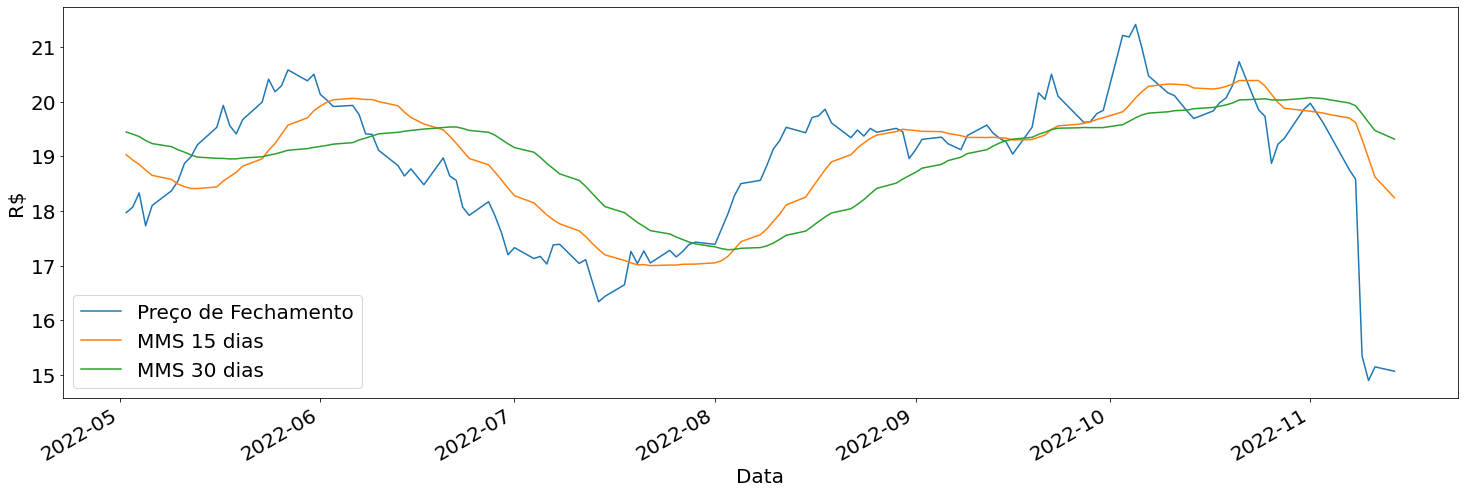

In [9]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

df_ticker[['date', 'close', 'mms_15', 'mms_30']].loc[df_ticker['date'] >= '2022-05-01'].dropna().plot(
    figsize=(25,8),
    x = 'date'
)
plt.xlabel('Data')
plt.ylabel('R$')
plt.legend(['Preço de Fechamento', 'MMS 15 dias','MMS 30 dias'])

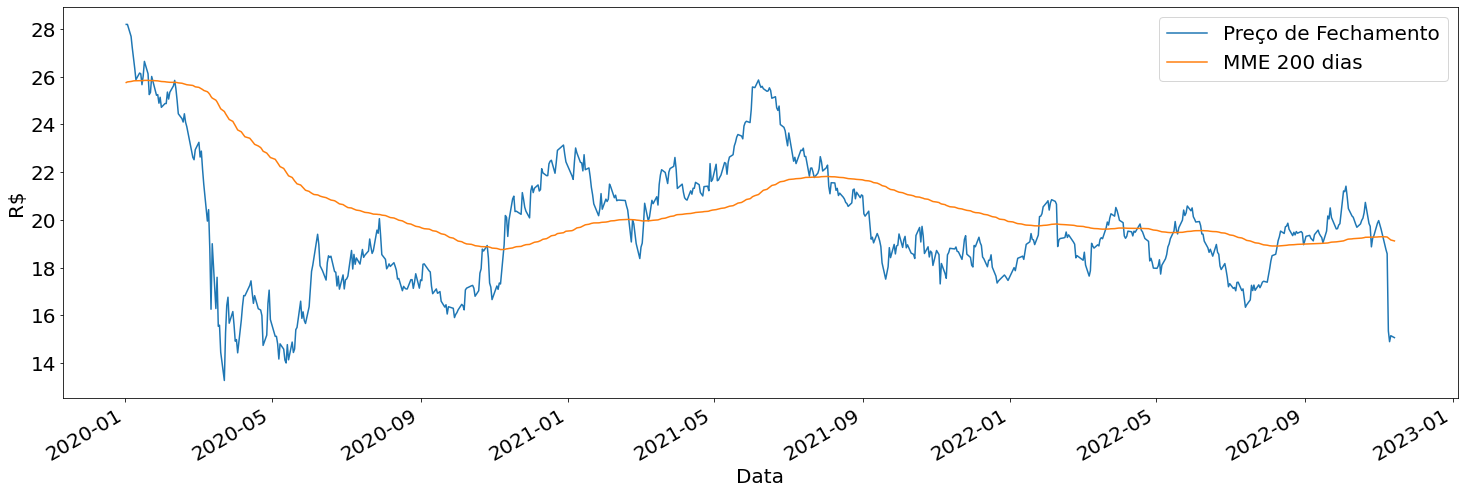

In [20]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

df_ticker[['date', 'close', 'mme_200']].loc[df_ticker['date'] >= '2020-01-01'].dropna().plot(
    figsize=(25,8),
    x = 'date'
)

plt.xlabel('Data')
plt.ylabel('R$')
plt.legend(['Preço de Fechamento', 'MME 200 dias'])

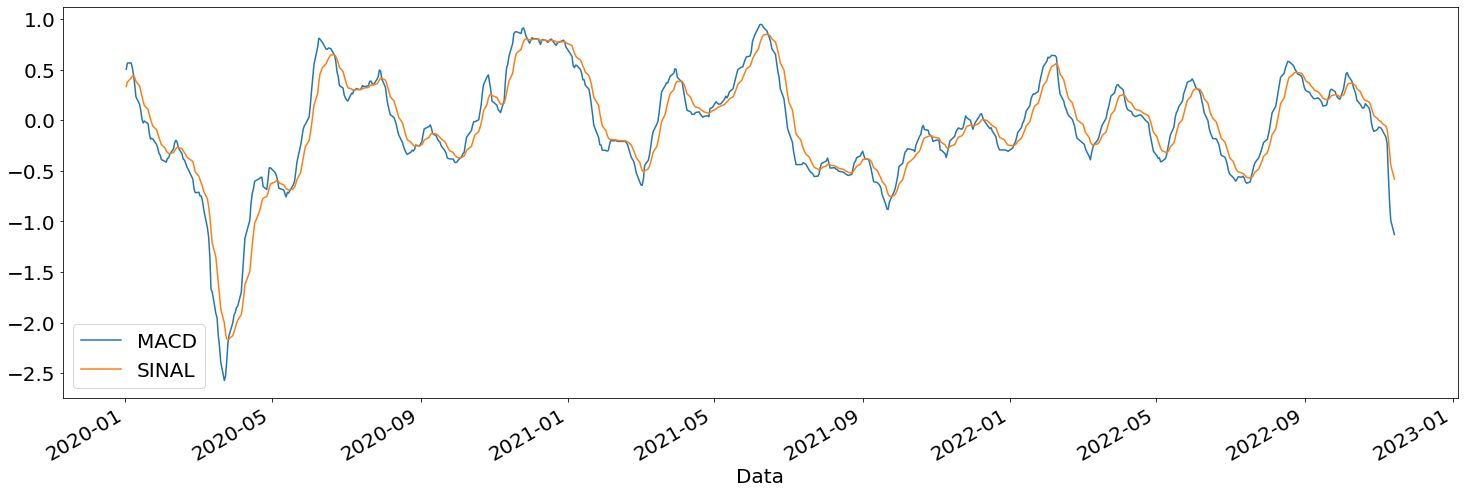

In [11]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

df_ticker[['date', 'macd', 'macd_sinal']].loc[df_ticker['date'] >= '2020-01-01'].dropna().plot(
    figsize=(25,8),
    x = 'date'
)

plt.xlabel('Data')
plt.legend(['MACD', 'SINAL', 'HISTOGRAMA'])

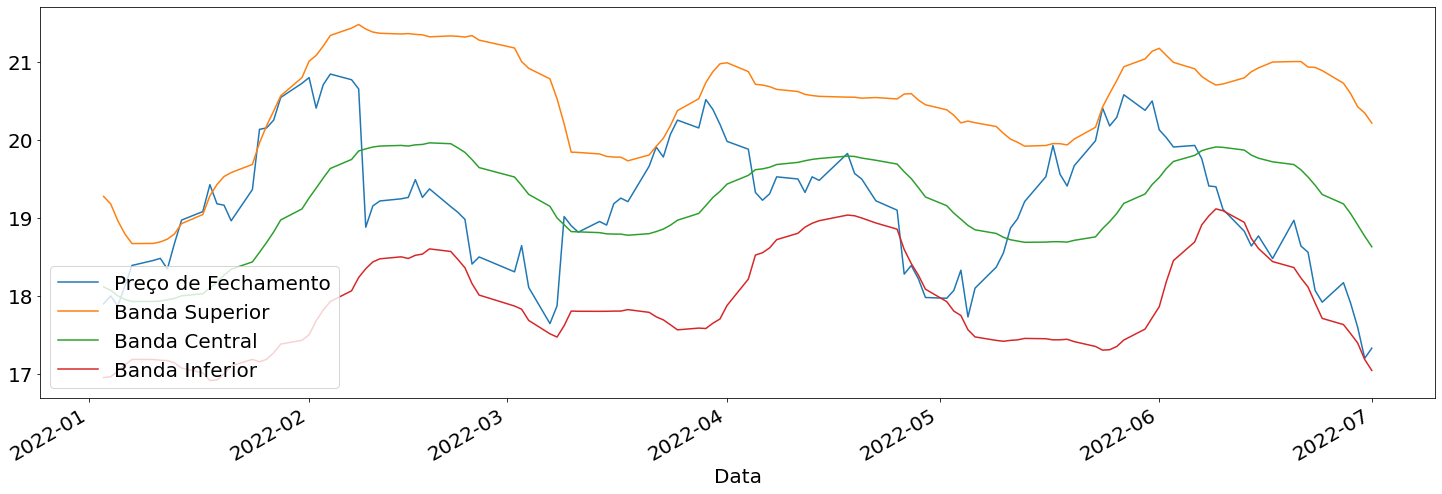

In [22]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

df_ticker[['date', 'close', 'bb_upper', 'bb_central', 'bb_lower']].loc[(df_ticker['date'] >= '2022-01-01') & (df_ticker['date'] <= '2022-07-01')].dropna().plot(
    figsize=(25,8),
    x = 'date'
)

plt.xlabel('Data')
plt.legend(['Preço de Fechamento', 'Banda Superior', 'Banda Central','Banda Inferior'], loc =  'lower left')

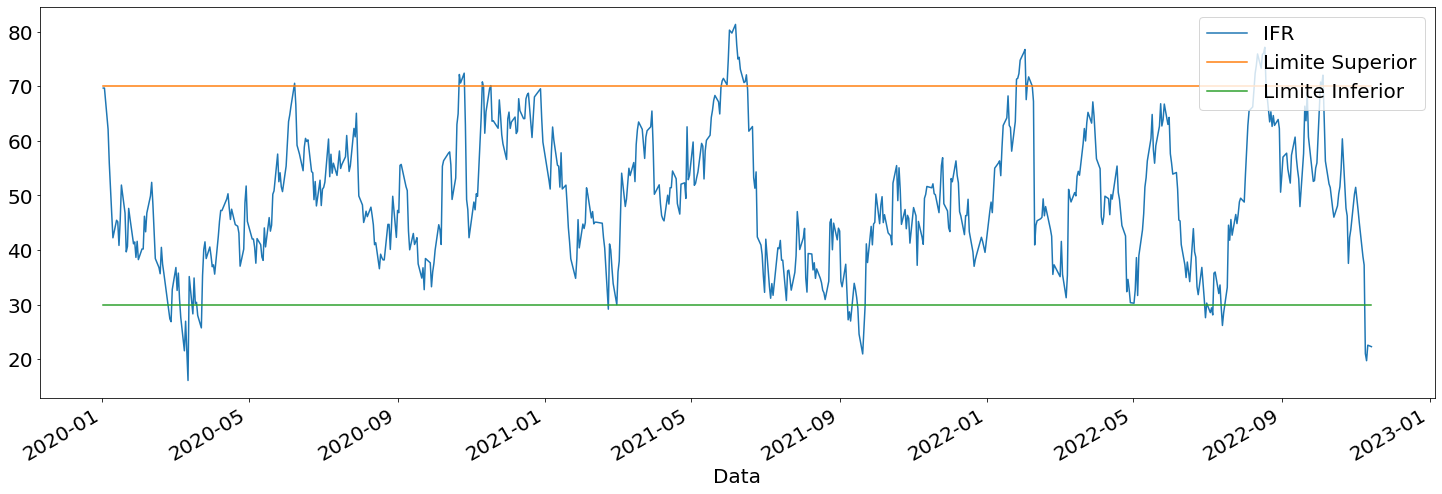

In [23]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
df_ticker['sup'] = 70
df_ticker['inf'] = 30
df_ticker[['date', 'ifr', 'sup', 'inf']].loc[df_ticker['date'] >= '2020-01-01'].dropna().plot(
    figsize=(25,8),
    x = 'date'
)

plt.xlabel('Data')
plt.legend(['IFR', 'Limite Superior', 'Limite Inferior'], loc =  'upper right')
df_ticker = df_ticker.drop(columns = ['sup', 'inf'])

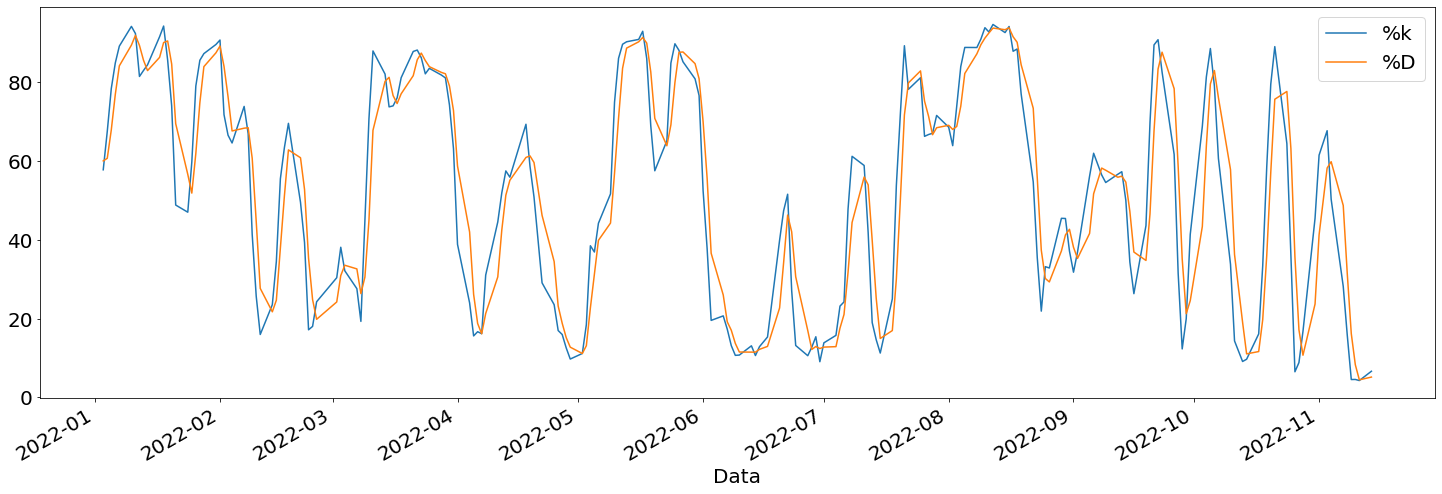

In [24]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
df_ticker[['date', '%k', '%D']].loc[df_ticker['date'] >= '2022-01-01'].dropna().plot(
    figsize=(25,8),
    x = 'date'
)

plt.xlabel('Data')
plt.legend(['%k', '%D'], loc =  'upper right')

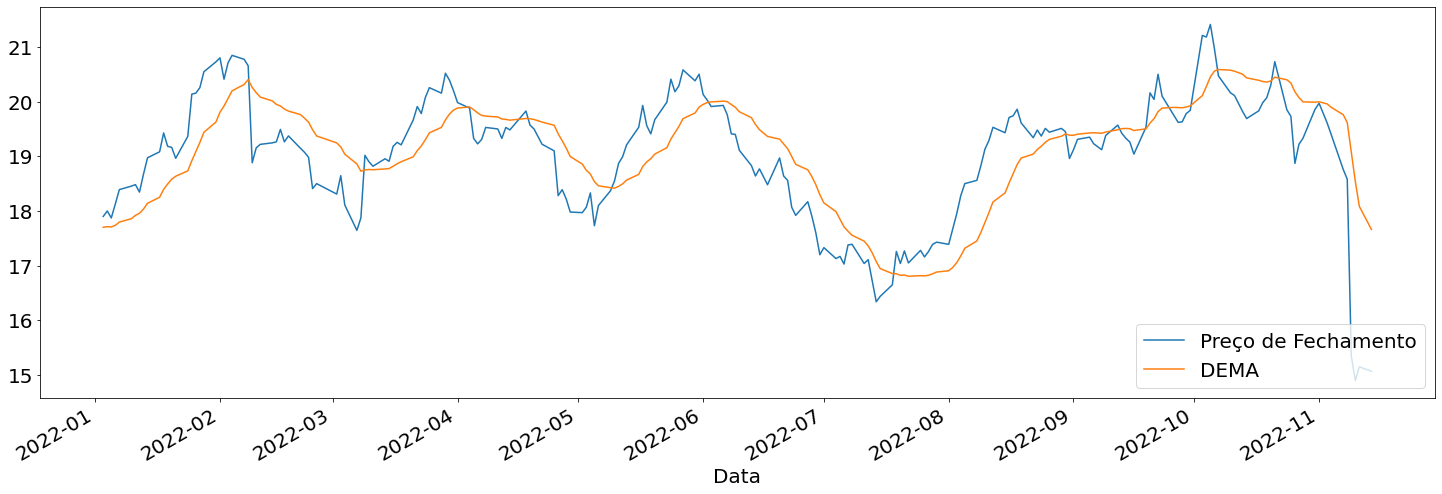

In [25]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
df_ticker[['date', 'close', 'dema']].loc[df_ticker['date'] >= '2022-01-01'].dropna().plot(
    figsize=(25,8),
    x = 'date'
)

plt.xlabel('Data')
plt.legend(['Preço de Fechamento', 'DEMA'], loc =  'lower right')

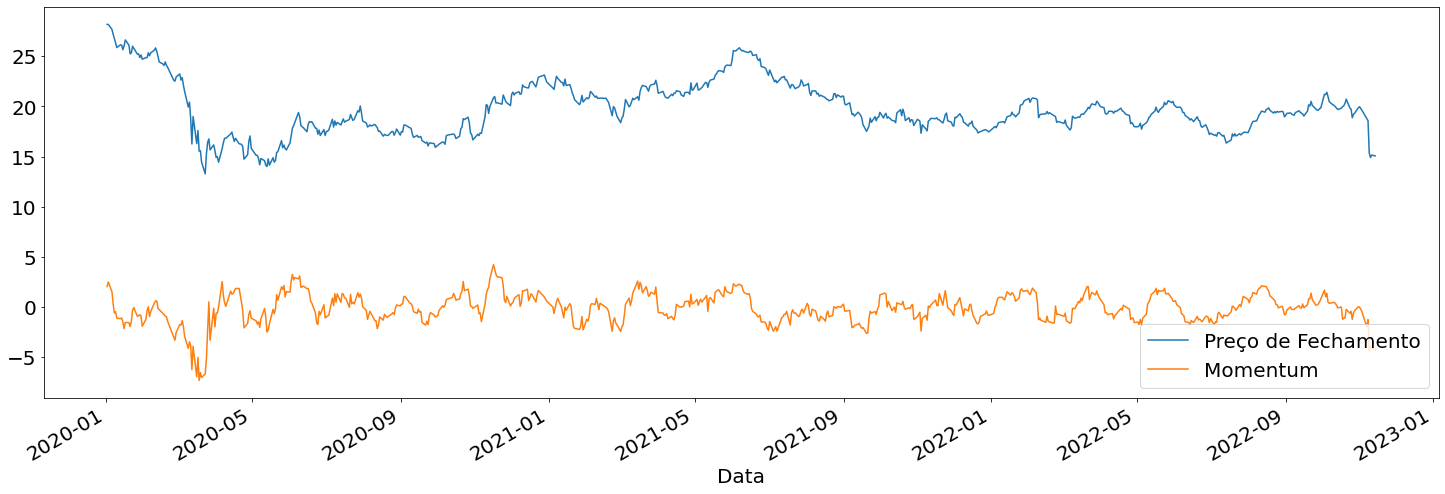

In [26]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
df_ticker[['date', 'close', 'momentum']].loc[df_ticker['date'] >= '2020-01-01'].dropna().plot(
    figsize=(25,8),
    x = 'date'
)

plt.xlabel('Data')
plt.legend(['Preço de Fechamento', 'Momentum'], loc =  'lower right')

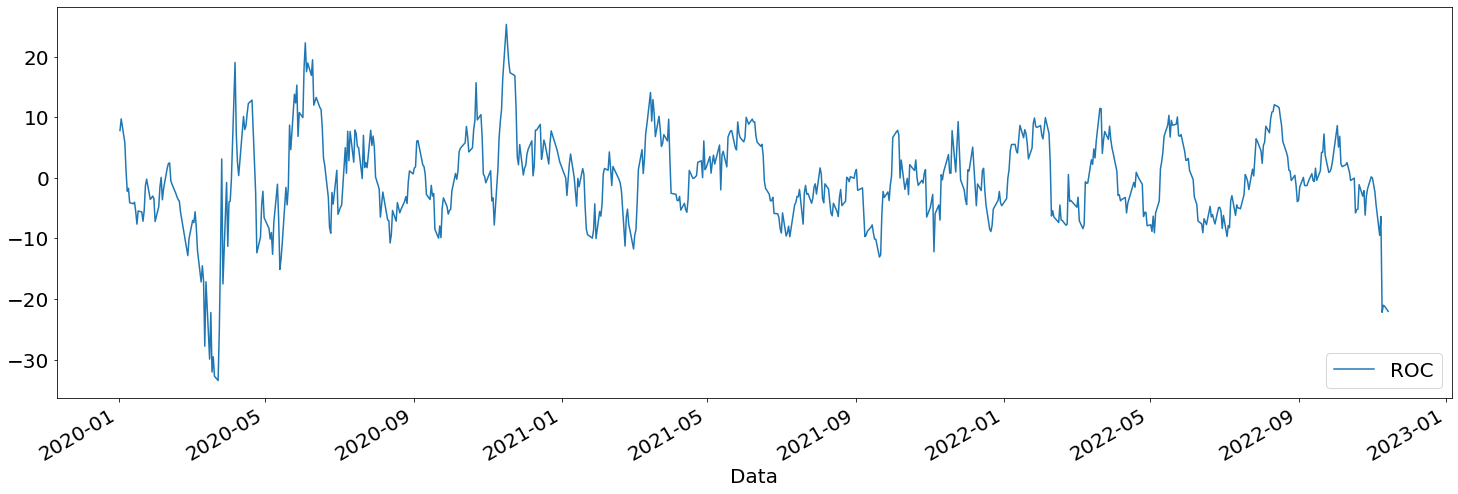

In [27]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
df_ticker[['date', 'roc']].loc[df_ticker['date'] >= '2020-01-01'].dropna().plot(
    figsize=(25,8),
    x = 'date'
)

plt.xlabel('Data')
plt.legend(['ROC'], loc =  'lower right')

In [28]:
### Saving processed data
path = 'data\\processed'
df_ticker.to_csv(f"{chose_path_to_work(path)}\\{ticker}_processed.csv", index = False)